In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
#import modeltools.bathy
import modeltools.hycom.io
import modeltools.cice.io

import numpy
grid1=modeltools.grid.Proj4Grid("+proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere",
                              -89.5,45.5,20000,20000,400,300)
#figure=grid1.plotgrid(1.5)
#matplotlib.pyplot.show()


modeltools.hycom.io.write_regional_grid(grid1)
modeltools.cice.io.write_netcdf_grid(grid1,"cice_grid.nc")



2015-11-16 14:10:51,323 - modeltools.grid -   DEBUG: Initialized P-grid using projection +proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere
2015-11-16 14:10:51,326 - modeltools.grid -   DEBUG: Lower left corner lon/lat of grid: (-89.5,45.5)
2015-11-16 14:10:51,327 - modeltools.grid -   DEBUG: Grid spacing in projection coords: (2e+04,2e+04)
2015-11-16 14:10:51,328 - modeltools.grid -   DEBUG: Number of grid Nodes in x/y      : (  400,  300)
2015-11-16 14:10:51,335 - modeltools.grid -   DEBUG: Min   x projection coordinate = -3.65e+06
2015-11-16 14:10:51,336 - modeltools.grid -   DEBUG: Max   x projection coordinate = 4.37e+06
2015-11-16 14:10:51,336 - modeltools.grid -   DEBUG: Min   y projection coordinate = -3.71e+06
2015-11-16 14:10:51,338 - modeltools.grid -   DEBUG: Max   y projection coordinate = 2.31e+06
2015-11-16 14:10:51,339 - modeltools.grid -   DEBUG: Min lon = -180
2015-11-16 14:10:51,340 - modeltools.grid -   DEBUG: Max lon = 180
2015-11-16 14:10:51,341 - modeltoo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1 90.0
2 0.0
(300, 400)
400
1 90.0
2 0.0


DEBUG:root:Filtering width half-width = 11 grid cells


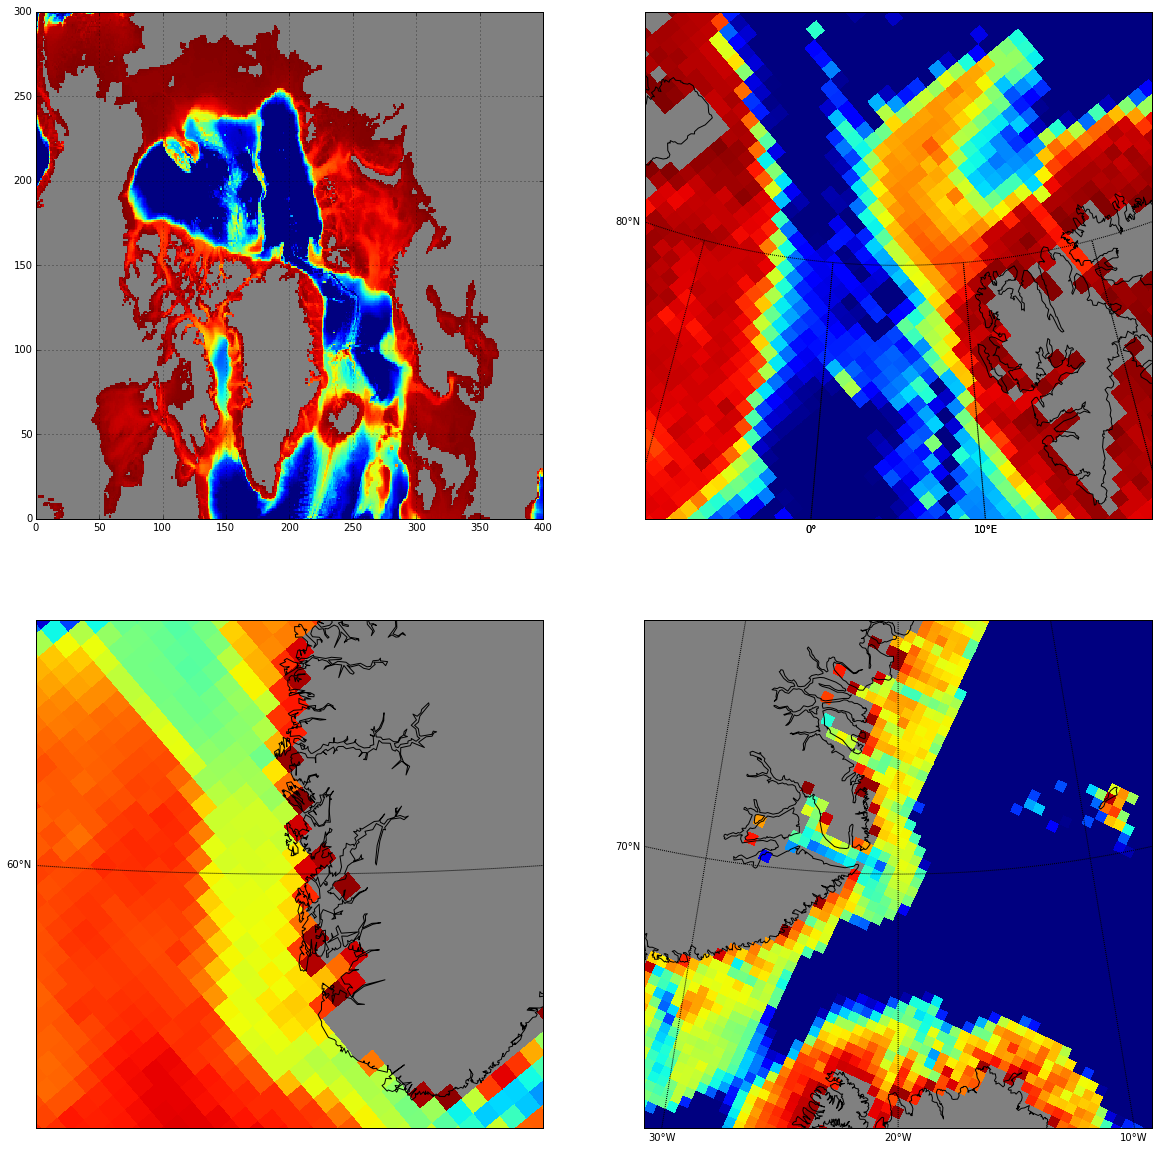

In [2]:
from mpl_toolkits.basemap import Basemap
#gebco = modeltools.bathy.GEBCO2014("/Users/knutal/Bathymetry/GEBCO/GEBCO_2014_2D.nc")
gebco = modeltools.bathy.GEBCO2014()

lon,lat=grid1.pgrid()

w2=gebco.regrid(lon,lat,width=grid1.dx)
w2=numpy.ma.masked_where(w2>=modeltools.bathy.default_threshold,w2)





def plot_map(ax,m,lon,lat,w2) :
    x,y=m(lon,lat)
    P=m.pcolormesh(x,y,w2,ax=ax)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    m.drawcoastlines()
    m.drawmapboundary() # draw a line around the map region
    m.drawparallels(numpy.arange(-90.,120.,10.),labels=[1,0,0,0],ax=ax) # draw parallels
    m.drawmeridians(numpy.arange(0.,420.,10.),labels=[0,0,0,1],ax=ax) # draw meridians
    ax.grid()
    return P

def plot_excerpt(lon,lat,w2) :

    figure = matplotlib.pyplot.figure(figsize=(20,20))
    ax=figure.add_subplot(221)
    P=matplotlib.pyplot.pcolormesh(w2)
    P.set_clim(-3000,0)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    ax.grid()

    ax=figure.add_subplot(222)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)



    ax=figure.add_subplot(223)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(224)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
plot_excerpt(lon,lat,w2)


-5304.5
-5.5
PAss 1
Found 411 one neighbour cells
Found 90 one neighbour cells
Found 42 one neighbour cells
Found 17 one neighbour cells
Found 6 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 0 one neighbour cells
Main feature in terms of cells is feature 6
Position (  0.000, 60.000) : Feature 6 is used
Position ( 36.000, 75.000) : Feature 6 is used
Found 222 islets
Found 22 islets
Found 7 islets
Found 4 islets
Found 2 islets
Found 0 islets
PAss 2
Found 0 one neighbour cells
Main feature in terms of cells is feature 1
Position (  0.000, 60.000) : Feature 1 is used
Position ( 36.000, 75.000) : Feature 1 is used
Found 0 islets


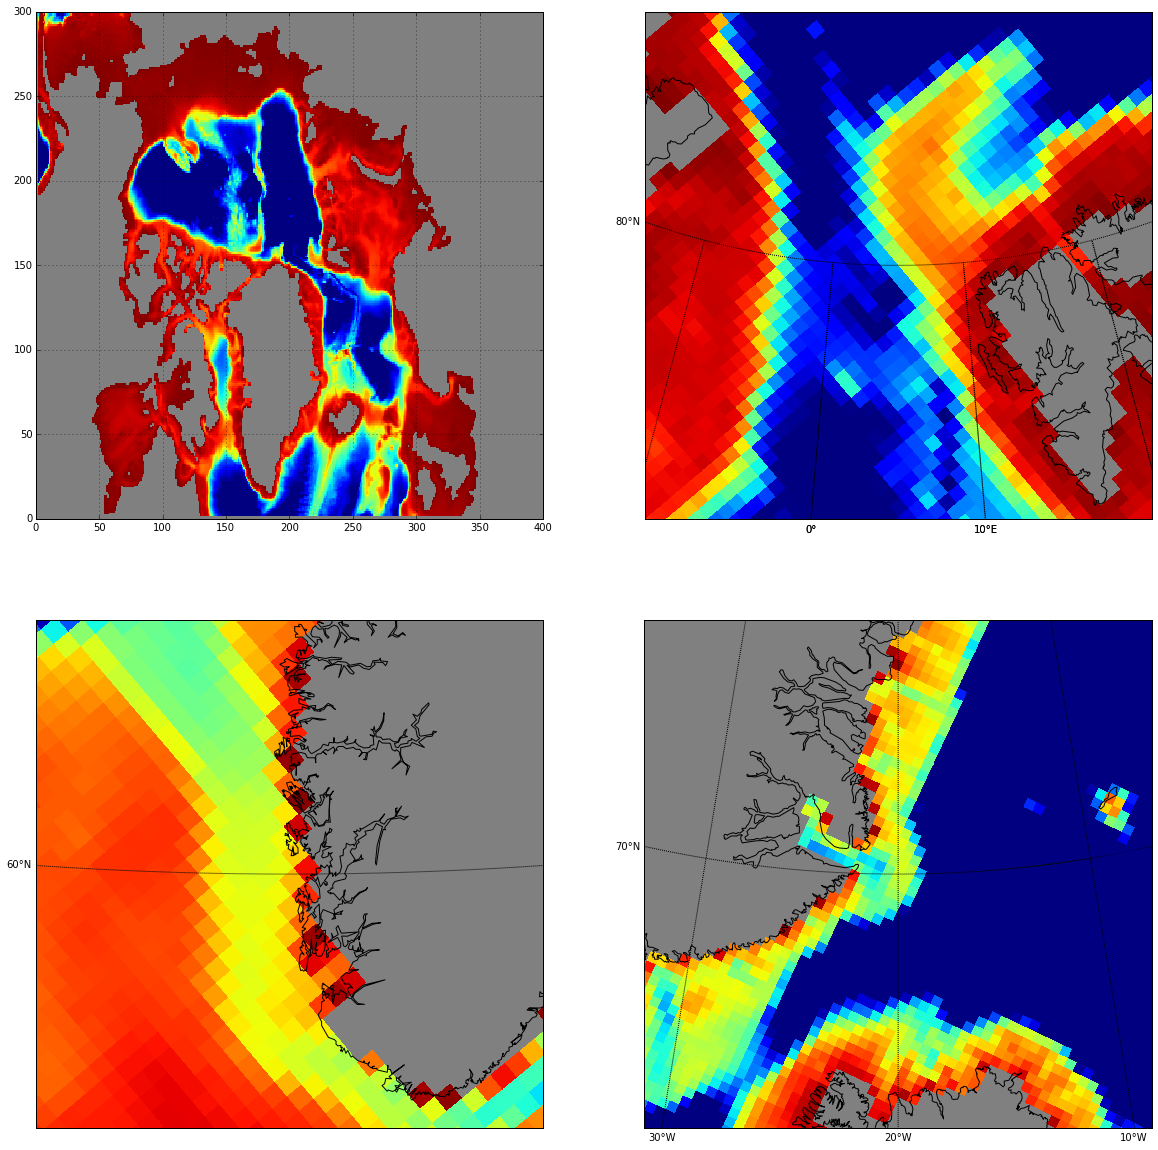

In [9]:
print numpy.min(w2)
print numpy.max(w2)
w3=numpy.copy(w2)
w3=modeltools.bathy.shapiro_filter(w3)

print "PAss 1"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

print "PAss 2"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

w3=numpy.ma.masked_where(w3>=modeltools.bathy.default_threshold,w3)

plot_excerpt(lon,lat,w3)

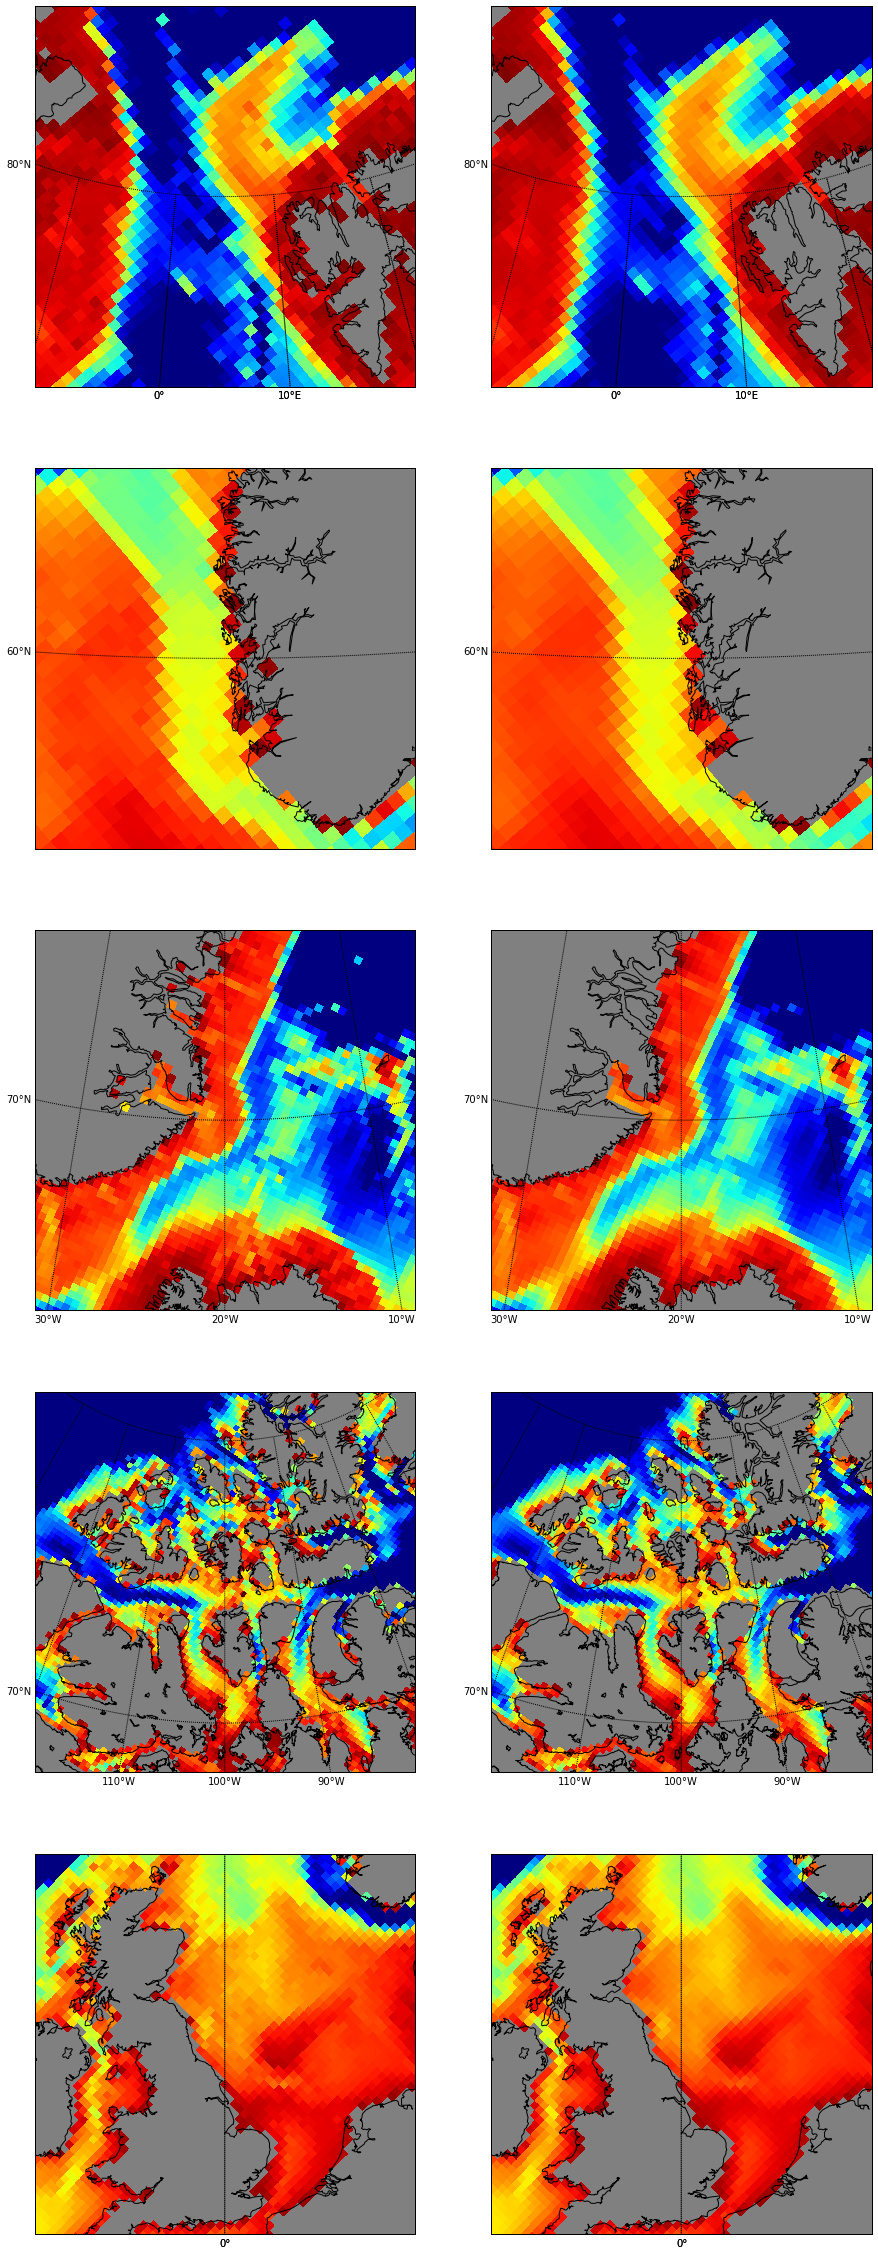

In [4]:
def plot_sidebyside(lon,lat,w2,w3) :

    figure = matplotlib.pyplot.figure(figsize=(15,40))

    ax=figure.add_subplot(521)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)
    
    ax=figure.add_subplot(522)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-3000,0)


    ax=figure.add_subplot(523)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(524)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)

    
    ax=figure.add_subplot(525)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-2000,0)
    
    ax=figure.add_subplot(526)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-2000,0)
    
    
    ax=figure.add_subplot(527)
    m = Basemap(width=1500000,height=1500000,
                resolution='i',projection='stere',\
                lat_ts=75,lat_0=75,lon_0=-100)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(528)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(529)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=55,lat_0=55,lon_0=0)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-300,0)
    
    ax=figure.add_subplot(5,2,10)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-300,0)

    matplotlib.pyplot.show()
    
    
plot_sidebyside(lon,lat,w2,w3)

In [12]:
modeltools.hycom.io.write_bathymetry("TPTa0.20",1,-w3,-modeltools.bathy.default_threshold)
print w3.mask
print numpy.max(w3)
print numpy.min(w3)
print modeltools.bathy.default_threshold
kmt=numpy.where(~w3.mask,1.,0.)
print numpy.max(kmt)
print numpy.min(kmt)
modeltools.cice.io.write_netcdf_kmt(kmt,"cice_kmt.nc")

DEBUG:root:Endianness set to big


in write_bathymetry 68101 120000
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True False ...,  True  True  True]
 [ True  True False ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
-5.5
-4830.6015625
-5.0
1.0
0.0


DEBUG:root:Endianness set to big


5.5 4830.6015625


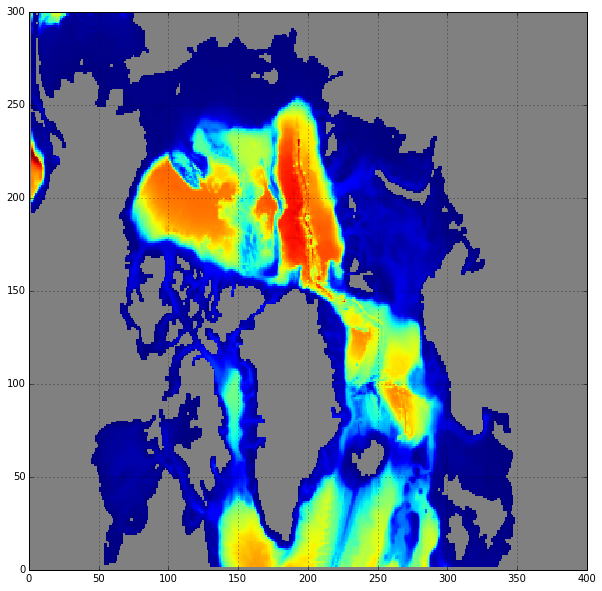

In [9]:
tmp=modeltools.hycom.io.ABFileBathy("depth_TPTa0.20_01","r",w3.shape[1],w3.shape[0])
w4=tmp.readfield("depth")
w4=numpy.ma.masked_where(w4> modeltools.hycom.io.AFile._huge*.5,w4)
tmp.close()
figure = matplotlib.pyplot.figure(figsize=(10,10))
ax=figure.add_subplot(111)
P=matplotlib.pyplot.pcolormesh(w4)
#P.set_clim(0,3000)
ax = P.get_axes()
ax.set_axis_bgcolor('.5')
ax.grid()
